# Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [2]:
import os
from urllib.request import urlretrieve
import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(URL, 'Fremont.csv')
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East']
    return data

In [3]:
data = get_fremont_data()

In [4]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


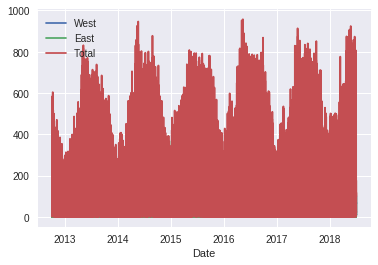

In [5]:
data.plot()

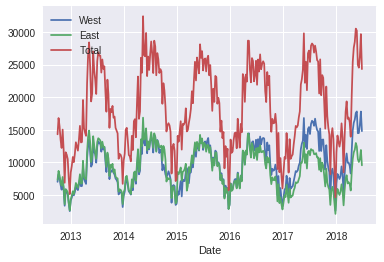

In [6]:
data.resample('W').sum().plot();

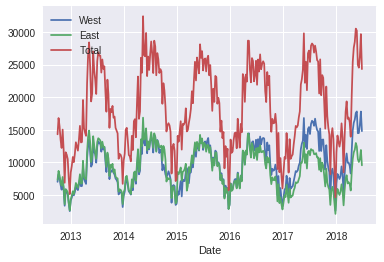

In [7]:
data.resample('W').sum().plot();

(0, 1071703.9)

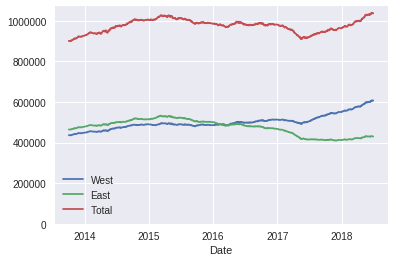

In [8]:
# Lets look at yearly trend by changing from weekly to Daily and do rolling window of 365
ax = data.resample('D').sum().rolling(365).sum().plot();
# Lets take the exes to 0 to better see what really happening
ax.set_ylim(0, None)


(0, 1071703.9)

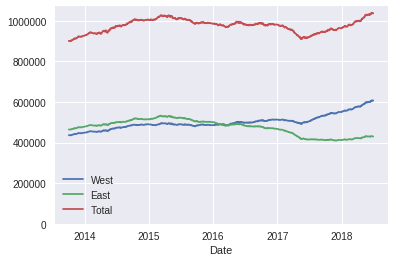

In [9]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)

Another thing we could do is take a closer look at the daily trend by hour and see if there is any pattern

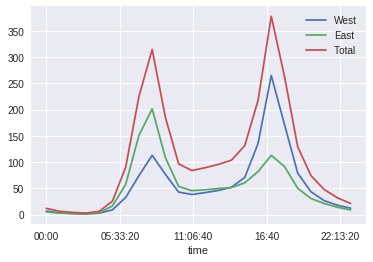

In [10]:
data.groupby(data.index.time).mean().plot()

In [11]:
# Pivot the data to see whats 
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

In [12]:
pivoted.iloc[:5, -5:]
# giving us the day on the coloumns and hour of the day on the rows

,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
00:00:00,21.0,11.0,11.0,9.0,45.0
01:00:00,2.0,3.0,1.0,6.0,17.0
02:00:00,3.0,3.0,1.0,6.0,6.0
03:00:00,2.0,5.0,4.0,4.0,6.0
04:00:00,13.0,22.0,10.0,11.0,5.0


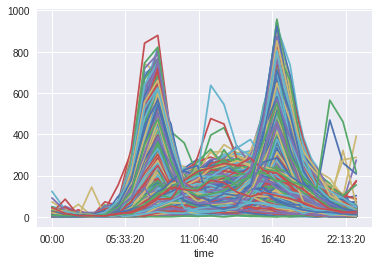

In [13]:
pivoted.plot(legend=False)
# each line correspond to a day. It hard to see here so am gonna add some transparency 

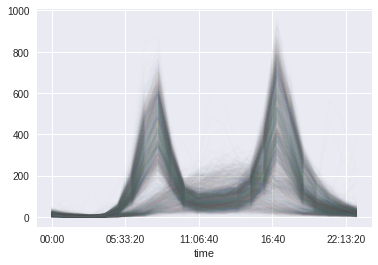

In [14]:
pivoted.plot(legend=False, alpha=0.01)

We can see that some days have commute patterns with bimodal plots, these seemed to be weekdays kind of patters. We can also se some other patterns that peaks around midday, those am thinking are like weekend or holiday days. We can take closer look to verify these observations.